**BUSINESS CHALLENGE/REQUIREMENT**

Mashable (www.mashable.com) is a global, multi-platform media and entertainment company. Powered by its own proprietary technology, Mashable is the go-to source for tech, digital culture and entertainment content for its dedicated and influential audience around the globe.

Just like any other media company its success depends on the popularity of articles.  And one of the key metrics to measure popularity is no. of shares done on article.

Over period of few years Mashable has collected data on around 40,000 articles. You as ML expert have to do analysis and modeling to predict number of shares of an article given the input parameters.

**KEY ISSUES**
* Data contains large number of features
* Prediction is of continuous value (shares) 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import datetime as dt #work with date type
from scipy import stats #Stats frameworks

#Visualisation frameworks
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

from scipy.special import inv_boxcox #Remove box-cox transformation
from sklearn.model_selection import train_test_split # Split

In [2]:
#Loading our df
df = pd.read_csv('C:/Users/gabri/Desktop/Data Science/Python/Python for Data Science - Edureka/Certification Project/OnlineNewsPopularity.csv')

#Printing first five rows and shape
print(df.shape)
df.head()

(39644, 61)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.isna().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

We can drop the first column since we're not going to use it and it's the only object dtype:

In [5]:
df = df.drop('url', axis=1)
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## EDA

Our dependent variable is the number of shares that the post is going to have. Let's see which columns it have a high correlation and plot its distribution

In [6]:
correlation = df.corr()['shares'].sort_values(ascending = False).to_frame().head(12)
cmap = sns.light_palette("red", as_cmap = True)
table = correlation.style.background_gradient(cmap = cmap)
table

,shares
shares,1.000000
kw_avg_avg,0.110413
LDA_03,0.083771
kw_max_avg,0.064306
self_reference_avg_sharess,0.057789
self_reference_min_shares,0.055958
self_reference_max_shares,0.047115
num_hrefs,0.045404
kw_avg_max,0.044686
kw_min_avg,0.039551


C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness / Assimetria: 33.963885


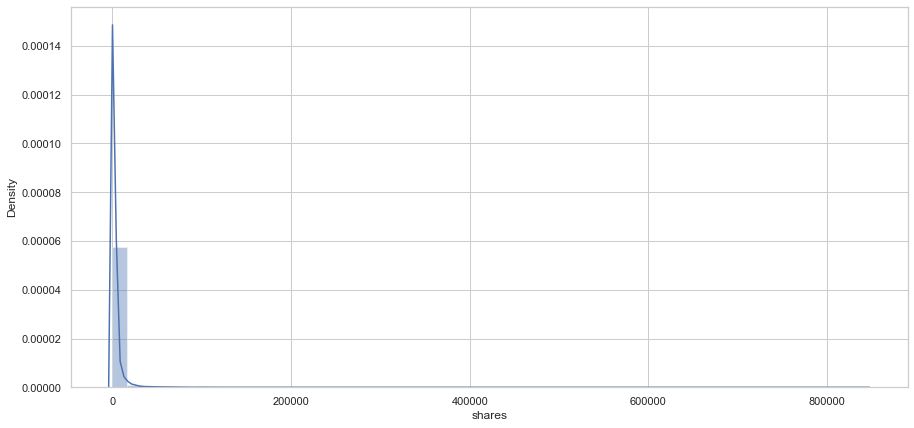

In [7]:
#Setting white grid for all graphs
sns.set(style="whitegrid")

#Setting figure size
plt.figure(figsize=(15, 7))

#Creating figure
sns.distplot(df['shares'])

#Printing results
print("Skewness / Assimetria: %f" % df['shares'].skew())
plt.show()

It seems that we have some outliers on our target column, let's take a close look:

<AxesSubplot:xlabel='shares'>

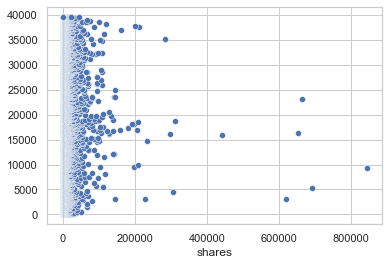

In [8]:
#Distplot
sns.scatterplot(x=df['shares'], y=df.index)

Let's drop rows above 200.000 since they don't represent most of the population

<AxesSubplot:xlabel='shares'>

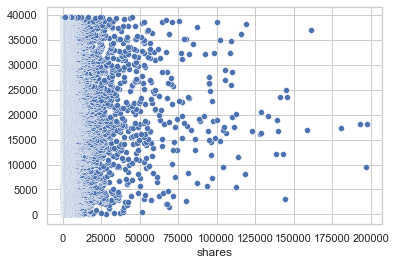

In [9]:
df = df.drop(df[(df['shares']>200000)].index)

#Distplot
sns.scatterplot(x=df['shares'], y=df.index)

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness / Assimetria: 10.036182


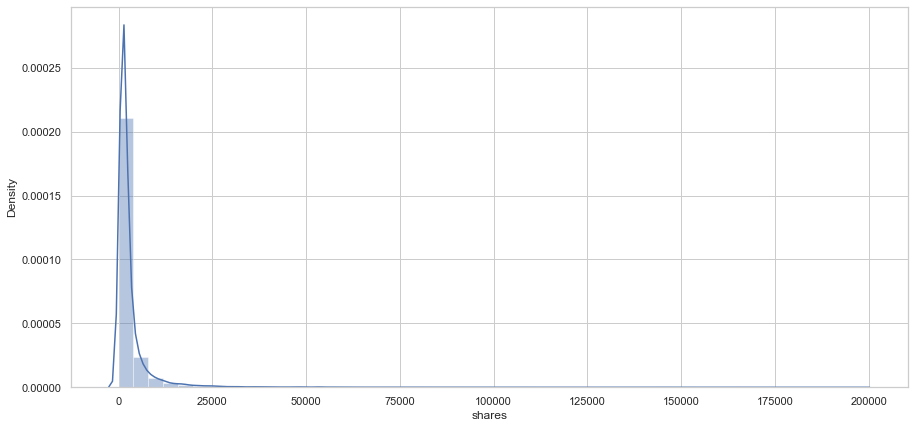

In [10]:
#Setting white grid for all graphs
sns.set(style="whitegrid")

#Setting figure size
plt.figure(figsize=(15, 7))

#Creating figure
sns.distplot(df['shares'])

#Printing results
print("Skewness / Assimetria: %f" % df['shares'].skew())
plt.show()

Now that we've dealt with some of the outliers, lets make our data normally distributed.

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness / Assimetria: -0.241167


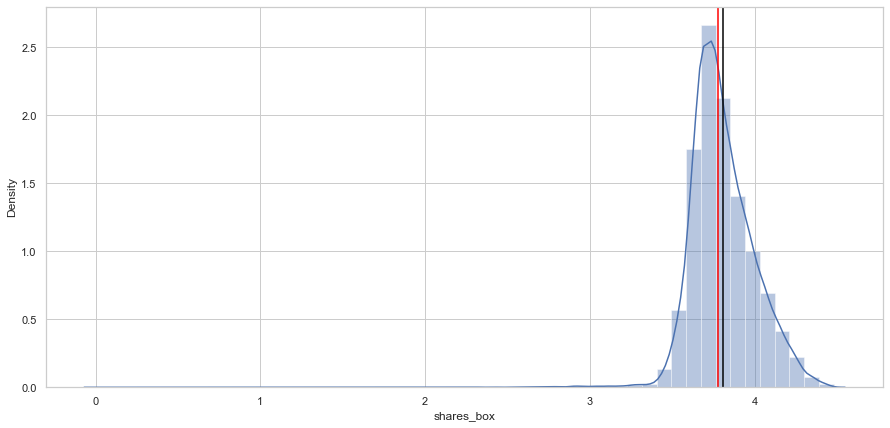

In [11]:
#Setting figure size
plt.figure(figsize=(15, 7))

#Making log transformation
df['shares_box'], x_lambda = stats.boxcox(df['shares'])

#Creating figure
sns.distplot(df['shares_box'])
#Creating MEAN BLACK line
plt.axvline(df['shares_box'].mean(), c = 'black')
#Creating MEDIAN RED line
plt.axvline(df['shares_box'].median(), c = 'red')

#Printing results
print("Skewness / Assimetria: %f" % df['shares_box'].skew())
plt.show()

Okay, now that we normalized our distribution we can start creating our models. Let's split our data between train and test:

In [12]:
X = df.drop(['shares_box', 'shares'], axis=1)
y = df['shares_box']

#Printing results
print('X shape:', X.shape, '\ny shape:', y.shape)
X.head()

X shape: (39627, 59) 
y shape: (39627,)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model Building

After we create our metric formula, let's test how Lasso regression and XGBoost deals with our data.

In [14]:
# Our Models
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

# Tools to create our models
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

# Metrics and cross-validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from skopt import gp_minimize, forest_minimize
from joblib import cpu_count

In [15]:
#Metric function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train,
                                   scoring="neg_mean_squared_error", cv = kf))
    
    return(rmse)

In [16]:
#Settings our parameters:
#Lasso Regression params
lasso_params = {
    'alpha': 0.00021
}

In [17]:
#Creating our model
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.001,random_state=1, tol=0.00001))

#Printing score
score = rmsle_cv(lasso)
print("Lasso score: \nMean: {:.6f}\nStandard Deviation: {:.4f}".format(score.mean(), score.std()))

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414.91405146033145, tolerance: 0.009300196626797885
  positive)
C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419.2708012984228, tolerance: 0.009396868127577887
  positive)
C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417.9577760510229, tolerance: 0.009323879556268996
  positive)


Lasso score: 
Mean: 0.179192
Standard Deviation: 0.0050


C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.6831960832507, tolerance: 0.009081000750648327
  positive)


In [18]:
# Using a random forest to optimize

def tune_xgbr(params):

    
    learning_rate = params[0] 
    n_estimators = params[1] 
    max_depth = params[2]
    subsample = params[3]
    gamma = params[4]
    min_child_weight = params[5]
    reg_alpha = params[6]
    reg_lambda = params[7]

    print(params, '\n')
    #Model to be optimized
    mdl = XGBRegressor(learning_rate = learning_rate, n_estimators = n_estimators, max_depth = max_depth,
                       subsample = subsample, gamma = gamma, min_child_weight = min_child_weight, 
                       reg_alpha = reg_alpha, reg_lambda = reg_lambda, random_state=1)

    #Cross-Validation in order to avoid overfitting
    mse = cross_val_score(mdl, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
    rmse = np.sqrt(-mse)
    print(rmse.mean())
    return rmse.mean()

In [19]:
# Creating a sample space in which the initial randomic search should be performed
param_grid = [(0.01, 0.3, 'log-uniform'), # learning rate mais baixas tendem a ser mais estáveis 
          (100, 8000), # n_estimators
          (1, 6), # max_depth 
          (0.1, 1.0), #subsample
          (0.001, 1.2), #gamma
          (0, 10), #min_child_weig ht
          (0.000001, 0.8), #reg_alpha
          (0.000001,0.5)] #red_lambda
         
# Minimization using a random forest with 20 random samples and 50 iterations for Bayesian optimization.
# result = forest_minimize(tune_xgbr, param_grid, random_state=1, n_calls=50, n_initial_points=10, n_jobs=-1, verbose=3)

In [20]:
XGBR_model = XGBRegressor(learning_rate = 0.12739, n_estimators = 3539, max_depth = 3,
                       subsample = 0.81035, gamma = 0.12477, min_child_weight = 8, 
                       reg_alpha = 0.3754, reg_lambda = 0.0481, random_state=1)

print(rmsle_cv(XGBR_model).mean())

array([0.17443629, 0.17138991, 0.17270084, 0.176059  , 0.18075158])

In [24]:
#Fitting our data
lasso_model = lasso.fit(X_train, y_train)
xgb_model = XGBR_model.fit(X_train, y_train)

#Predicting test data
lasso_predict = lasso.predict(X_test)
xgb_predict = XGBR_model.predict(X_test)

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516.8621371445109, tolerance: 0.011570140912535975
  positive)


In [28]:
#Score
print('Lasso Score score:', round(np.sqrt(mean_squared_error(y_test, lasso_predict)), 5))
print('XGB Score score:', round(np.sqrt(mean_squared_error(y_test, xgb_predict)), 5))

Lasso Score score: 0.17608
XGB Score score: 0.17158


In [43]:
#Adding and transforming our prediction to our submission dataframe
sub = pd.DataFrame()

#Transforming back to normal y_test values
sub['shares_actual'] = y_test.values
sub['shares_actual'] = inv_boxcox(sub['shares_actual'], x_lambda)

#Transforming back to normal predicted values
sub['shares_predicted'] = xgb_predict
sub['shares_predicted'] = inv_boxcox(sub['shares_predicted'], x_lambda)
sub.head()

,shares_actual,shares_predicted
0,1200.0,1039.941650
1,1400.0,1101.245850
2,705.0,1474.696289
3,963.0,1234.228394
4,4900.0,3534.014404
